In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
(train_image, train_label), (test_image, test_label) = tf.keras.datasets.fashion_mnist.load_data()
print(train_image.shape)

(60000, 28, 28)


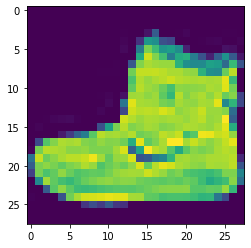

In [3]:
plt.imshow(train_image[0])
plt.show()

In [4]:
print(train_image[0])
print(np.max(train_image[0]))
print(np.min(train_image[0]))
print(train_label)

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

In [5]:
train_image = train_image / 255.0
test_image = test_image / 255.0

In [6]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc']
              )

In [8]:
model.fit(train_image, train_label, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5004 - acc: 0.8233
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3802 - acc: 0.8627
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3394 - acc: 0.8764
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3151 - acc: 0.8835
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2985 - acc: 0.8901


In [9]:
model.evaluate(test_image, test_label)

313/313 [==============================] - 0s 1ms/step - loss: 0.3656 - acc: 0.8696


[0.3655664324760437, 0.8695999979972839]

In [10]:
train_label_onehot = tf.keras.utils.to_categorical(train_label)
print(train_label_onehot)

[[0. 0. 0. ... 0. 0. 1.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [11]:
test_label_onehot = tf.keras.utils.to_categorical(test_label)
print(test_label_onehot)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [12]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [13]:
# model.compile(optimizer='adam',
#               loss='categorical_crossentropy',
#               metrics=['acc']
#               )

In [14]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['acc']
              )

In [15]:
model.fit(train_image, train_label_onehot, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5248 - acc: 0.8139
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4359 - acc: 0.8458
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4125 - acc: 0.8529
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4021 - acc: 0.8556
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3931 - acc: 0.8604


In [16]:
model.evaluate(test_image, test_label_onehot)

313/313 [==============================] - 0s 1ms/step - loss: 0.4289 - acc: 0.8530


[0.4288833439350128, 0.8529999852180481]

In [17]:
predict = model.predict(test_image)
print(predict)
print(predict.shape)

[[8.17362400e-14 5.13258250e-18 1.68408712e-21 ... 1.19108269e-02
  1.72979721e-11 9.66749787e-01]
 [3.13765020e-03 3.91945960e-08 9.94824171e-01 ... 2.96530411e-26
  1.64113478e-09 1.52355696e-19]
 [1.91096655e-16 1.00000000e+00 1.43708172e-21 ... 0.00000000e+00
  1.10330570e-18 0.00000000e+00]
 ...
 [1.98760827e-05 5.29710336e-13 1.74716592e-13 ... 1.75581661e-15
  9.99980092e-01 5.27174441e-13]
 [3.10901890e-12 9.99999762e-01 2.58301688e-17 ... 7.37287406e-20
  1.63186114e-11 1.87706080e-15]
 [5.68466530e-05 1.11924447e-09 1.05544444e-07 ... 1.64316911e-02
  1.99687527e-03 1.52204779e-03]]
(10000, 10)


In [18]:
print(predict[0])
print(np.argmax(predict[0]))

[8.1736240e-14 5.1325825e-18 1.6840871e-21 1.3273450e-25 6.8930175e-16
 2.1339351e-02 1.5922161e-17 1.1910827e-02 1.7297972e-11 9.6674979e-01]
9


In [19]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [20]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc']
              )

In [21]:
history = model.fit(train_image, train_label_onehot,
                    epochs=5,
                    validation_data=(test_image, test_label_onehot))

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8822 - acc: 0.6723 - val_loss: 0.5269 - val_acc: 0.8171
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6217 - acc: 0.7801 - val_loss: 0.4822 - val_acc: 0.8282
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5704 - acc: 0.8013 - val_loss: 0.4565 - val_acc: 0.8409
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5435 - acc: 0.8116 - val_loss: 0.4388 - val_acc: 0.8426
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5236 - acc: 0.8179 - val_loss: 0.4278 - val_acc: 0.8414


In [22]:
model.evaluate(test_image, test_label_onehot)

313/313 [==============================] - 0s 1ms/step - loss: 0.4278 - acc: 0.8414


[0.42782777547836304, 0.8414000272750854]

In [23]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


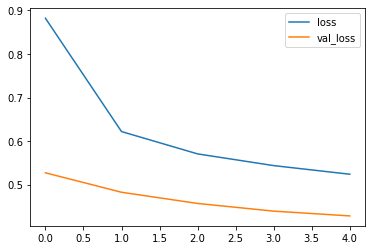

In [24]:
plt.plot(history.epoch, history.history.get('loss'), label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.legend()
plt.show()

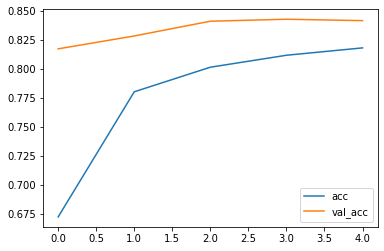

In [25]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')
plt.legend()
plt.show()

In [26]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
(train_image, train_lable), (test_image, test_lable) = tf.keras.datasets.fashion_mnist.load_data()

In [28]:
train_image.shape

(60000, 28, 28)

In [29]:
train_lable.shape

(60000,)

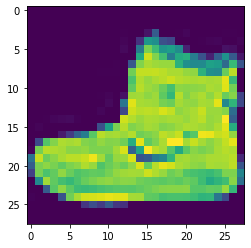

In [30]:
test_image.shape, test_lable.shape
plt.imshow(train_image[0])

In [31]:
np.max(train_image[0])
train_lable

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [32]:
train_image = train_image/255
test_image = test_image/255

In [33]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [34]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['acc']
             )

In [35]:
model.fit(train_image, train_lable, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4963 - acc: 0.8260
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3712 - acc: 0.8672
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3363 - acc: 0.8769
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3134 - acc: 0.8850
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2961 - acc: 0.8910


In [36]:
model.evaluate(test_image, test_lable)
train_lable

313/313 [==============================] - 0s 1ms/step - loss: 0.3586 - acc: 0.8714


array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [37]:
train_lable_onehot = tf.keras.utils.to_categorical(train_lable)
train_lable_onehot[-1]
test_lable_onehot = tf.keras.utils.to_categorical(test_lable)
test_lable_onehot

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [38]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [39]:
model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['acc']
             )

In [40]:
model.fit(train_image, train_lable_onehot, epochs=5)
predict = model.predict(test_image)
predict.shape
predict[0]
np.argmax(predict[0])
test_lable[0]

model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4982 - acc: 0.8239
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3711 - acc: 0.8671
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3369 - acc: 0.8784
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3142 - acc: 0.8839
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2941 - acc: 0.8920


In [41]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_13 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [42]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
             loss='categorical_crossentropy',
             metrics=['acc']
             )

In [43]:
model.fit(train_image, train_lable_onehot, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5252 - acc: 0.8128
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4434 - acc: 0.8411
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4180 - acc: 0.8501
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4061 - acc: 0.8552
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3941 - acc: 0.8584


In [44]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [45]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_15 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_16 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_17 (Dense)             (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [46]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=['acc']
             )

In [47]:
model.fit(train_image, train_lable_onehot, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4842 - acc: 0.8248
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3642 - acc: 0.8661
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3333 - acc: 0.8774
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3088 - acc: 0.8850
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2917 - acc: 0.8925
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2775 - acc: 0.8957
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2655 - acc: 0.9012
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2572 - acc: 0.9043
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2486 - acc: 0.9060
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2388 - acc: 0.9096


In [48]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [49]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=['acc']
             )

In [50]:
history = model.fit(train_image, train_lable_onehot,
                   epochs=10,
                   validation_data=(test_image, test_lable_onehot))

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8793 - acc: 0.6748 - val_loss: 0.5335 - val_acc: 0.8041
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6125 - acc: 0.7817 - val_loss: 0.4906 - val_acc: 0.8219
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5674 - acc: 0.8015 - val_loss: 0.4598 - val_acc: 0.8327
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5406 - acc: 0.8093 - val_loss: 0.4418 - val_acc: 0.8460
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5204 - acc: 0.8188 - val_loss: 0.4383 - val_acc: 0.8475
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5128 - acc: 0.8179 - val_loss: 0.4254 - val_acc: 0.8494
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5053 - acc: 0.8230 - val_loss: 0.4170 - val_acc: 0.8463
Epoch 8/10
1875/1875 [==============================] - 5s 3ms

In [51]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

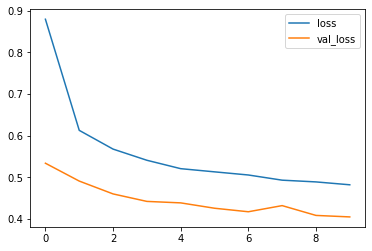

In [52]:
plt.plot(history.epoch, history.history.get('loss'),label='loss')
plt.plot(history.epoch, history.history.get('val_loss'), label='val_loss')
plt.legend()

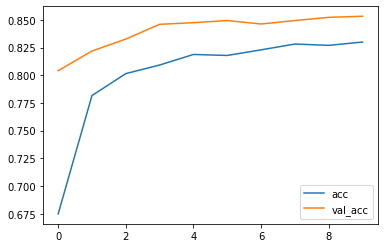

In [53]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')
plt.legend()

In [54]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [55]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
             loss='categorical_crossentropy',
             metrics=['acc']
             )

In [56]:
history = model.fit(train_image, train_lable_onehot,
                   epochs=10,
                   validation_data=(test_image, test_lable_onehot))

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5498 - acc: 0.8114 - val_loss: 0.4769 - val_acc: 0.8344
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4157 - acc: 0.8532 - val_loss: 0.4249 - val_acc: 0.8476
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3785 - acc: 0.8649 - val_loss: 0.4157 - val_acc: 0.8537
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3570 - acc: 0.8713 - val_loss: 0.4140 - val_acc: 0.8490
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3392 - acc: 0.8770 - val_loss: 0.3696 - val_acc: 0.8696
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3259 - acc: 0.8816 - val_loss: 0.3736 - val_acc: 0.8647
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3149 - acc: 0.8860 - val_loss: 0.3732 - val_acc: 0.8676
Epoch 8/10
1875/1875 [==============================] - 3s 2ms

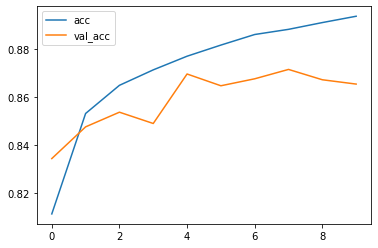

In [57]:
plt.plot(history.epoch, history.history.get('acc'), label='acc')
plt.plot(history.epoch, history.history.get('val_acc'), label='val_acc')
plt.legend()
plt.show()